In [1]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 50;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 20
cphl = CPHL.CPHLSolver(N_sites, g_vals);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);

OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)


data = hcat(g_vals, OString_bare_vals, ZZ_bare_vals / (cphl.N_sites - 1))
writedlm("DATA/bare_data_$(N_sites).txt", data)

In [2]:
@load "DATA/ALPHAMat_$(N_sites).jld2" ALPHAMat

cphl.ALPHAMat = ALPHAMat
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);
CPHL.SetUpHamiltonians(cphl);

writedlm("DATA/ALPHAMat_$(N_sites).txt", ALPHAMat)
writedlm("DATA/CMat_$(N_sites).txt", cphl.CMat)
data = hcat(g_vals, cphl.OString_GS_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1))
writedlm("DATA/full_data_$(N_sites).txt", data)

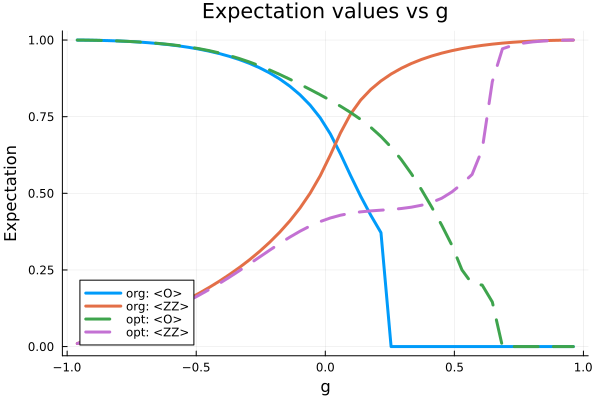

In [3]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

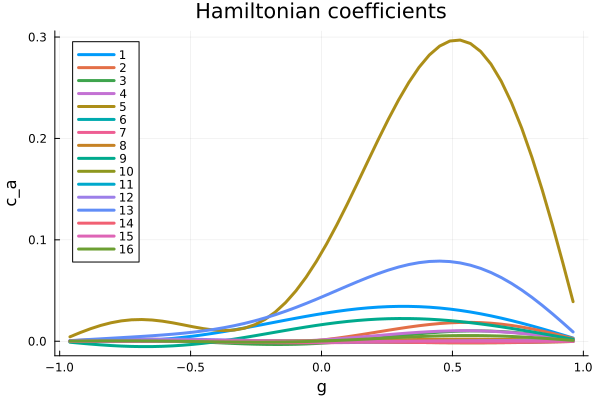

In [4]:
l = plot(cphl.g_vals, cphl.CMat[:, 1], label="$(1)", title="Hamiltonian coefficients", xlabel="g", ylabel="c_a", linewidth=3);
for idx in 2:cphl.N_op
    plot!(l, cphl.g_vals, cphl.CMat[:, idx], label="$(idx)", linewidth=3)
end


display(l)